pre-covid mental Health 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read in the data

data = pd.read_csv(r"C:\Users\ahask\Documents\DA8\Capstone\Capstone\Data\mentalhealth.zip")

#display head
data.head()


C:\Users\ahask\AppData\Local\Temp\ipykernel_5812\3522168550.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\ahask\Documents\DA8\Capstone\Capstone\Data\mentalhealth.zip")


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [16]:
usdata = data[data['Entity'] == 'United States']
usdata







,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6076,6076,United States,USA,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
6077,6077,United States,USA,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
6078,6078,United States,USA,1992,0.337343,0.654205,0.47861,6.536143,2.339515,4.651949,2.107931
6079,6079,United States,USA,1993,0.336207,0.654431,0.483539,6.525536,2.347095,4.648701,2.080669
6080,6080,United States,USA,1994,0.335536,0.65462,0.488235,6.522278,2.365738,4.649294,2.058632
...,...,...,...,...,...,...,...,...,...,...,...
108184,108184,United States,USA,2013,14854640.943900,NaN,NaN,NaN,NaN,NaN,NaN
108185,108185,United States,USA,2014,15000147.279000,NaN,NaN,NaN,NaN,NaN,NaN
108186,108186,United States,USA,2015,15155130.939300,NaN,NaN,NaN,NaN,NaN,NaN
108187,108187,United States,USA,2016,15321682.155200,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
colors = ['#000000', '#fefefd', '#e2debc', '#dfb399', '#ba9990', '#adc4af', '#77a5a2', '#336d7c', '#083c4e', '#062e3b']

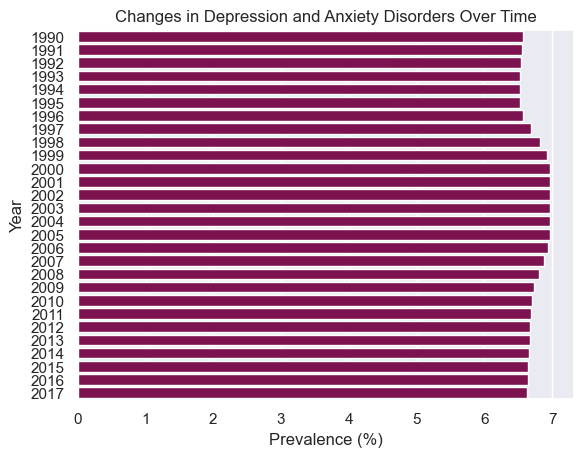

In [14]:
# Filtered data for depression and anxiety disorders
depression_data = usdata[['Year', 'Depression (%)']]
anxiety_data = usdata[['Year', 'Anxiety disorders (%)']]


mergedata = depression_data.merge(anxiety_data, on='Year')
mergedata = mergedata.dropna()

sns.set(style="darkgrid")
colors = [ '#8f0053']

# Create
sns.barplot(data=mergedata, y='Year', x='Depression (%)', label='Depression', palette=colors)
sns.barplot(data=mergedata, y='Year', x='Anxiety disorders (%)', label='Anxiety Disorders', palette=colors)
plt.title('Changes in Depression and Anxiety Disorders Over Time')
plt.xlabel('Prevalence (%)')

plt.show()



In [9]:
# Filtered data for depression
depression_data = usdata[['Year', 'Depression (%)']]

# Drop rows with missing values
depression_data = depression_data.dropna()

# Find the year with the highest depression percentage
max_depression_year = depression_data['Year'][depression_data['Depression (%)'].idxmax()]

# Print the year with the highest depression percentage
print(f"The year with the highest depression percentage is {max_depression_year}.")


The year with the highest depression percentage is 2017.


In [17]:
# Filtered data for depression
depression_data = usdata[['Year', 'Depression (%)']]
depression_data = depression_data.dropna()
max_depression_year = depression_data['Year'][depression_data['Depression (%)'].idxmax()]

#highest depression percentage
max_depression_percent = depression_data['Depression (%)'].max()
rounded_max_depression_percent = round(max_depression_percent)

# Print the years
print(f"The year with the highest depression percentage is {max_depression_year}.")
print(f"The highest depression percentage is {rounded_max_depression_percent}.")

#print
top5_depression_years = depression_data.nlargest(5, 'Depression (%)')
print("The top 5 years with the highest depression percentage are:")
for index, row in top5_depression_years.iterrows():
    rounded_percent = round(row['Depression (%)'], 2)
    print(f"Year: {row['Year']}, Depression Percentage: {rounded_percent}")


The year with the highest depression percentage is 2017.
The highest depression percentage is 5.
The top 5 years with the highest depression percentage are:
Year: 2017, Depression Percentage: 4.84
Year: 2016, Depression Percentage: 4.81
Year: 2015, Depression Percentage: 4.8
Year: 2006, Depression Percentage: 4.79
Year: 2005, Depression Percentage: 4.79


shifting focus to anxiety

In [18]:
# Filtered data for anxiety disorders
anxiety_data = usdata[['Year', 'Anxiety disorders (%)']]
anxiety_data = anxiety_data.dropna()
max_anxiety_year = anxiety_data['Year'][anxiety_data['Anxiety disorders (%)'].idxmax()]
max_anxiety_percent = anxiety_data['Anxiety disorders (%)'].max()
rounded_max_anxiety_percent = round(max_anxiety_percent)

# Print
print(f"The year with the highest anxiety disorders percentage is {max_anxiety_year}.")
print(f"The highest anxiety disorders percentage is {rounded_max_anxiety_percent}.")




The year with the highest anxiety disorders percentage is 2001.
The highest anxiety disorders percentage is 7.
